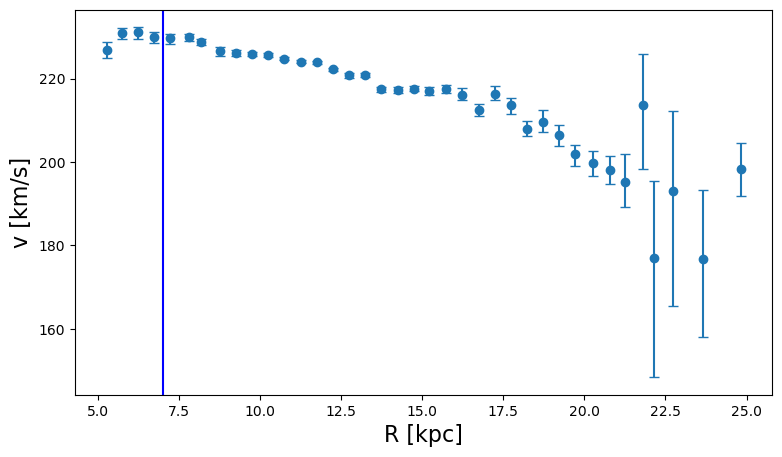

In [21]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
examp1 = Table.read('../data/vcdata_eilers2018.dat', format='ascii')
examp1
import matplotlib.pyplot as plt
err = np.vstack((examp1['-sigma_v'], examp1['+sigma_v']))
fig = plt.figure(figsize=(9,5))
# plt.plot(examp1['R'], examp1['v'], '-', color='red', lw=3)
plt.errorbar(examp1['R'], examp1['v'], yerr=err, fmt='o', capsize=3.5)
plt.xlabel('R [kpc]')
plt.ylabel('v [km/s]')
plt.axvline(x = 7, color = 'b', label = 'axvline - full height')
plt.xlabel('R [kpc]', fontsize = 16)
plt.ylabel('v [km/s]', fontsize = 16)
plt.show()
fig.savefig('C:/Users/olive/OneDrive/Desktop/2023_MW_darkM/MW_evidence_DM/velocity2.png', bbox_inches='tight')

In [3]:
!pip install astropy

                                              0.0/6.6 MB ? eta -:--:--
                                              0.0/6.6 MB 653.6 kB/s eta 0:00:10
     --                                       0.4/6.6 MB 3.7 MB/s eta 0:00:02
     ----                                     0.8/6.6 MB 5.7 MB/s eta 0:00:02
     ------                                   1.0/6.6 MB 6.6 MB/s eta 0:00:01
     ------                                   1.0/6.6 MB 6.6 MB/s eta 0:00:01
     --------                                 1.4/6.6 MB 4.8 MB/s eta 0:00:02
     -----------                              1.9/6.6 MB 5.7 MB/s eta 0:00:01
     ------------                             2.1/6.6 MB 6.0 MB/s eta 0:00:01
     -------------                            2.2/6.6 MB 5.2 MB/s eta 0:00:01
     ----------------                         2.7/6.6 MB 5.8 MB/s eta 0:00:01
     -------------------                      3.1/6.6 MB 6.3 MB/s eta 0:00:01
     -------------------                      3.1/6.6 MB 6.3 MB/s eta

2.45e+09
[8.25595384e+14 8.00392546e+14 7.75886980e+14 7.52587608e+14
 7.31284875e+14 7.07077638e+14 6.93095001e+14 6.72159550e+14
 6.55941612e+14 6.40692657e+14 6.26050521e+14 6.12528837e+14
 5.99508397e+14 5.87211205e+14 5.75580694e+14 5.64780016e+14
 5.54526137e+14 5.44391244e+14 5.34948059e+14 5.25957324e+14
 5.17721880e+14 5.09206851e+14 5.01390709e+14 4.93913692e+14
 4.86613127e+14 4.79754323e+14 4.73301164e+14 4.66973149e+14
 4.61127568e+14 4.55378148e+14 4.49060698e+14 4.43528181e+14
 4.38708145e+14 4.33045581e+14 4.29712077e+14 4.24104769e+14
 4.15693370e+14 4.05868957e+14] m(3/2) / (kpc(1/2) s)


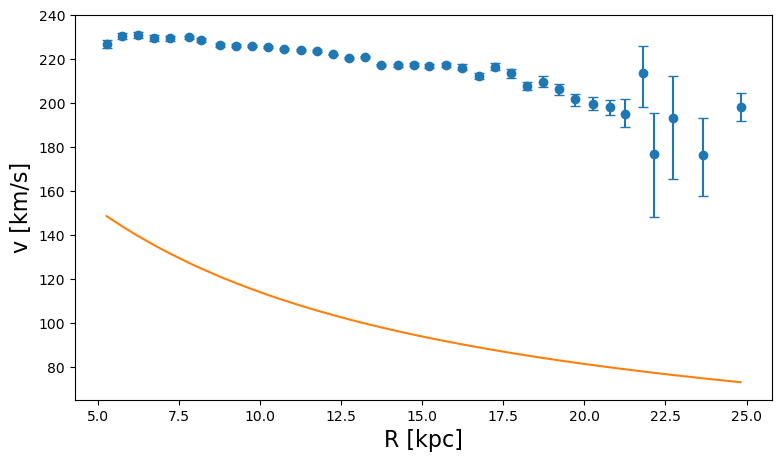

In [19]:
import sys
sys.path.append("C:/Users/olive/OneDrive/Desktop/2023_MW_darkM/MW_evidence_DM/Scripts/")
from utils import mass_disc
from astropy.constants import M_sun, G
import astropy.units as u
stellar_surface_density = 42e6 # Msun/kpc2
# normalization constand D
D = stellar_surface_density/(np.exp(-8.122/2.15)*2*0.4*(1-np.exp(-1.1/0.4))) # Msun/kpc3
print('%.2e'%D)
mass        = []
radius_list = list(examp1['R'])
# for loop (for each element in examp1['R'], call mass_disc and append the output in the above list)
for i in range(len(radius_list)):
    #print(i, radius_list[i], mass_disc(radius_list[i]))
    mass.append(mass_disc(radius_list[i], D=D, Rd=2.5))
mass_u = mass*M_sun
mass_u
radius_list_u = radius_list*u.kpc
radius_list_u
velocity = np.sqrt(mass_u*G/radius_list_u)
print(velocity)
velocity = velocity.to(u.km/u.s)
fig = plt.figure(figsize=(9,5))
plt.errorbar(examp1['R'], examp1['v'], yerr=err, fmt='o', capsize=3.5)
plt.errorbar(examp1['R'], velocity)
plt.xlabel('R [kpc]', fontsize = 16)
plt.ylabel('v [km/s]', fontsize = 16)
fig.savefig('C:/Users/olive/OneDrive/Desktop/2023_MW_darkM/MW_evidence_DM/velocity1.png', bbox_inches='tight')

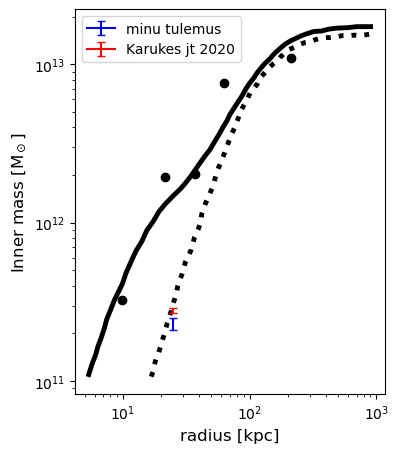

In [22]:
points_x = np.array([9.93112261399379,
    21.700950028502557,
    36.87159866415928, 
    63.44910145266272, 
    210.5562150477641])

points_y = np.array([323861381167.78375,
    1947466754238.7349,
    2031901429839.2522,
    7578896731731.328,
    10913196460867.477])

data = np.genfromtxt('/Users/olive/OneDrive/Desktop/2023_MW_darkM/MW_evidence_DM/data/oliver.dat', unpack=True)
data1 = np.genfromtxt('/Users/olive/OneDrive/Desktop/2023_MW_darkM/MW_evidence_DM/data/oliver_v2.dat', unpack=True)

mass       = 2.3e11
error_mass = 0.2e11
radius      = 25.

fig, ax = plt.subplots(1, 1, figsize=(4, 5))

ax.plot(data[0], data[1], lw=3.5, color='k')
ax.plot(data1[0], data1[1], lw=3.5, color='k', ls=':')
ax.scatter(points_x, points_y, color='k')

ax.errorbar(radius, mass, yerr=error_mass, color='blue', capsize=3., label='minu tulemus')
ax.errorbar(radius, 2.8e11, yerr=0.1e11, color='red', capsize=3., label='Karukes jt 2020')

ax.legend()

ax.set_ylabel(r'Inner mass [M$_\odot$]', fontsize=12); ax.set_xlabel('radius [kpc]', fontsize=12)

ax.set_yscale('log'); ax.set_xscale('log')
fig.savefig('C:/Users/olive/OneDrive/Desktop/2023_MW_darkM/MW_evidence_DM/Einasto.png')